## Gene tree estimation error in sliding windows

What size window is too big such that concatenation washes away the differences among genealogies for MSC-based analyses (i.e., ASTRAL, SNAQ).

In [1]:
import toytree
import ipcoal
import numpy as np
import ipyrad.analysis as ipa
import toyplot, toyplot.svg
import pandas as pd

print('ipcoal', ipcoal.__version__)
print('toytree', toytree.__version__)
print('ipyrad', ipa.__version__)

ipcoal 0.1.4
toytree 2.0.3
ipyrad 0.9.56


In [2]:
#make output directory 
! mkdir -p /rigel/dsi/users/slh2181/locus_length/simulation_6tip/
outdir = "/rigel/dsi/users/slh2181/locus_length/simulation_6tip/"

In [3]:
#set the tree style
ts = {
    'ts': 'p', 
    'layout': 'r',
    'height': 300,
    'node_sizes': 7,
    'node_style': {"stroke": "black", 'stroke-width': 2},
    'node_labels': False,
    'edge_type': 'c',
#    'scalebar': False,
    'tip_labels_align': True,
    'tip_labels_style': {"font-size":"15px"},
    'scalebar': True,
    'tip_labels_colors': ["maroon","red","orange","green","darkturquoise","dodgerblue","mediumblue","darkviolet"],
}

### Set up a phylogenetic model

In [4]:
# get an ultrametric imbalanced tree with some short internal nodes
#get a topology with 8 tips and a tree height of 8,000,000 generations
tree = toytree.rtree.imbtree(ntips=8, treeheight=8e6)
tree = tree.mod.node_slider(0.99, seed=1234)
canvas, axes, mark = tree.draw(**ts);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t8d953c658cf545f0b18a73f1d9c6b025" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 300.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r1 r2 r3 r4 r5 r6 r7 0 4000000 8000000

In [5]:
#save plot
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/locus_length/simulation_6tip/tree_model_6tip.svg")
# save to file
tree.write("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/tree_model_6tip.nwk")

### Simulate a concatenated sequence (chromosome)

In [6]:
#set the mutation rate (this is the default)
mu=1e-08

In [7]:
model = ipcoal.Model(
    tree=tree,   # use the topology from unittree above
    Ne=1e6,      # when increased, recombination more likely to change topology 
    nsamples=1,  # make this diploid 
    mut=mu,      # this will create differences which can be used to drop samples by cut site
    recomb=1e-9, # this will vary the gene trees, this is the default
    seed=123,
)

In [8]:
#simulate the sequence with params above and 1 chromosome of length 100,000
#takes ~36 hours
model.sim_loci(nloci=1, nsites=5e7)

# Write data (without spacers) to SEQS HDF5 format
model.write_loci_to_hdf5(name="no_spacer_6tip", outdir=outdir, diploid=False)
model.df.to_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/true_genealogy_12haploid.csv")

wrote 1 loci to /rigel/dsi/users/slh2181/locus_length/simulation_6tip/no_spacer_6tip.seqs.hdf5


In [9]:
# show the total number of genealogies
print('ngenealogies:', model.df.tidx.max())
print('mean len of gtree: {:.2f} bp'.format(model.df.nbps.mean()))

ngenealogies: 1200594
mean len of gtree: 41.65 bp


In [10]:
model.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,36,36,17,0,"(r6:1.1338e+07,(r7:1.04535e+07,(r5:7.93338e+06,(r3:6.60377e+06,(r4:4.30739e+06,(r2:3.94752e+06,(r0:2.35573e+06,r1:2.35573e+06):1.5918e+06):359863):2.29639e+06):1.32960e+06):2.52007e+06):884532);"
1,0,36,183,147,60,1,"(r6:1.1338e+07,(r7:1.04535e+07,(r5:7.93338e+06,(r4:4.30739e+06,((r0:2.35573e+06,r1:2.35573e+06):1.5918e+06,(r2:3.50585e+06,r3:3.50585e+06):441675):359863):3.62599e+06):2.52007e+06):884532);"
2,0,183,190,7,2,2,"(r6:1.1338e+07,(r7:1.04535e+07,(r5:7.93338e+06,((r2:3.50585e+06,r3:3.50585e+06):441675,(r4:3.78855e+06,(r0:2.35573e+06,r1:2.35573e+06):1.43282e+06):158976):3.98586e+06):2.52007e+06):884532);"
3,0,190,298,108,45,3,"((r7:1.04535e+07,((r2:3.50585e+06,r3:3.50585e+06):441675,(r4:3.78855e+06,(r0:2.35573e+06,r1:2.35573e+06):1.43282e+06):158976):6.50593e+06):884532,(r5:9.01466e+06,r6:9.01466e+06):2.32332e+06);"
4,0,298,317,19,8,4,"((r5:9.01466e+06,(r6:8.79948e+06,((r2:3.50585e+06,r3:3.50585e+06):441675,(r4:3.78855e+06,(r0:2.35573e+06,r1:2.35573e+06):1.43282e+06):158976):4.85196e+06):215175):2.32332e+06,r7:1.1338e+07);"
...,...,...,...,...,...,...,...
1200590,0,49999922,49999928,6,5,1200590,"(((r1:4.74737e+06,(r4:3.69471e+06,r2:3.69471e+06):1.05266e+06):3.63997e+06,(r5:6.24126e+06,(r0:4.12795e+06,r3:4.12795e+06):2.11332e+06):2.14607e+06):869123,(r7:8.97945e+06,r6:8.97945e+06):277003);"
1200591,0,49999928,49999932,4,2,1200591,"(((r0:4.12795e+06,r3:4.12795e+06):4.25938e+06,(r5:6.17718e+06,(r1:4.74737e+06,(r4:3.69471e+06,r2:3.69471e+06):1.05266e+06):1.42981e+06):2.21016e+06):869123,(r7:8.97945e+06,r6:8.97945e+06):277003);"
1200592,0,49999932,49999939,7,5,1200592,"(((r5:6.17718e+06,(r1:4.74737e+06,(r4:3.69471e+06,(r2:3.66377e+06,r3:3.66377e+06):30939):1.05266e+06):1.42981e+06):2.21016e+06,r0:8.38734e+06):869123,(r7:8.97945e+06,r6:8.97945e+06):277003);"
1200593,0,49999939,49999974,35,13,1200593,"(((r5:6.17718e+06,((r4:3.69471e+06,r3:3.69471e+06):1.05266e+06,(r1:3.51251e+06,r2:3.51251e+06):1.23486e+06):1.42981e+06):2.21016e+06,r0:8.38734e+06):869123,(r7:8.97945e+06,r6:8.97945e+06):277003);"


### Add missing data as spacers between loci and allele dropout

In [11]:
# assumed space between RAD tags
SPACER = 5000
CUTLEN = 5

# iterate over each RAD tag
for i in range(0, model.seqs.shape[2], SPACER):  # From 0 to nsites=1e5, by spacer? 
    
    # mask. [0-300=DATA][300-5300=SPACER]
    # start at 300, mask until 5000, then start at 5000+300, mask until 5000+5000...
    model.seqs[:, :, i+300: i+SPACER] = 9
    
    # allele dropout
    cseqs = model.seqs[:, :, i:i+CUTLEN]
    aseqs = model.ancestral_seq[0, i:i+CUTLEN]
    mask = np.any(cseqs != aseqs, axis=2)[0]
    model.seqs[:, mask, i:i+300] = 9

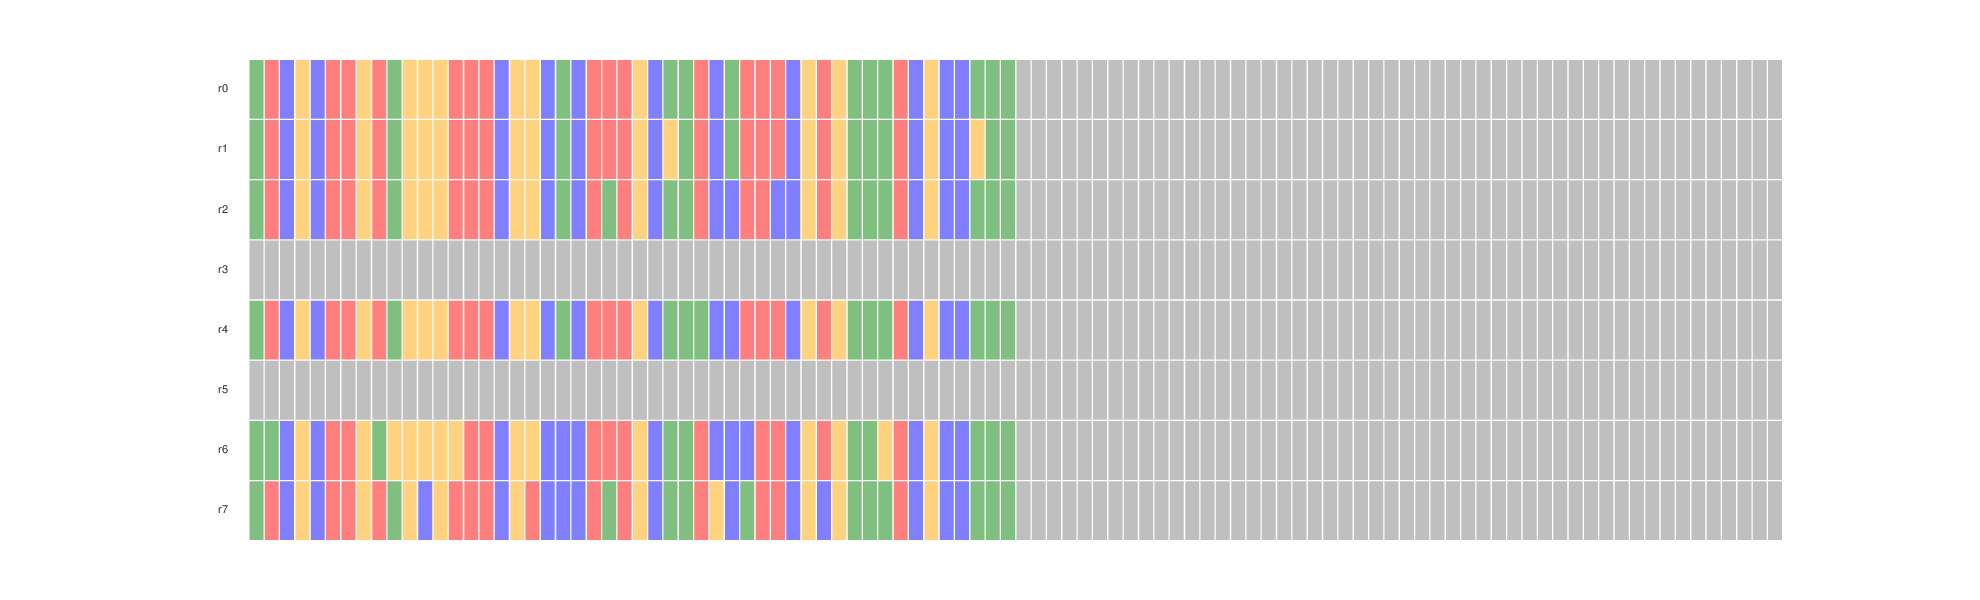

In [12]:
# check that data looks right, with sequence, including missing data on left and spacer on the right
canvas, axes = model.draw_seqview(0, 250, 350, height=600);

#write this to a file 
toyplot.svg.render(canvas, "/rigel/dsi/users/slh2181/locus_length/simulation_6tip/seqview_12haploid.svg")
canvas

### Write data to SEQS HDF5 format

In [14]:
# create a seqs.hdf5 file
model.write_loci_to_hdf5(name="with_spacer_6tip", outdir=outdir, diploid=False)

wrote 1 loci to /rigel/dsi/users/slh2181/locus_length/simulation_6tip/with_spacer_6tip.seqs.hdf5


### Reformat all genealogies for comparisons with inferred gene trees
The true gene trees will not distinguish among haplotypes, so we will drop one haplotype from each tip, and we will also multiply branch lengths by the mutation rate so that edge lengths are in units of mutations.

In [15]:
def convert_genealogy_to_gene_tree(gtree, mu=mu):
    # multiply by mutation rate
    gtree = gtree.set_node_values(
        feature="dist", 
        values={i: j.dist * mu for (i, j) in gtree.idx_dict.items()},
    )
    
    # drop the -1 haplotype from each
#    gtree = gtree.drop_tips([i for i in gtree.get_tip_labels() if "-1" in i])
    
    # drop -0 from names of remaining samples
#    gtree = gtree.set_node_values(
#        feature="name", 
#        values={i: j.name[:-2] for (i, j) in gtree.idx_dict.items()},
#    )
    return gtree

In [16]:
# convert genealogies to be gene-tree-like
#takes a few hours
model.df.genealogy = [
    convert_genealogy_to_gene_tree(toytree.tree(i)).write() 
    for i in model.df.genealogy
]

In [17]:
# This is the true gene tree along each part (non-recombined) of the genome. 
# With a recomb rate of 1e-9 and Ne=2e7, we have on the order of 1.4M genes
# With a recomb rate of 1e-9 and Ne=1e6, we have on the order of 7,000 genes
# With a recomb rate of 1e-9 and Ne=1e5, we have on the order of 2,000 genes
model.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,36,36,17,0,"(r6:0.11338,(r7:0.104535,(r5:0.0793338,(r3:0.0660377,(r4:0.0430739,(r2:0.0394752,(r0:0.0235573,r1:0.0235573)0:0.015918)0:0.00359863)0:0.0229639)0:0.013296)0:0.0252007)0:0.00884532);"
1,0,36,183,147,60,1,"(r6:0.11338,(r7:0.104535,(r5:0.0793338,(r4:0.0430739,((r0:0.0235573,r1:0.0235573)0:0.015918,(r2:0.0350585,r3:0.0350585)0:0.00441675)0:0.00359863)0:0.0362599)0:0.0252007)0:0.00884532);"
2,0,183,190,7,2,2,"(r6:0.11338,(r7:0.104535,(r5:0.0793338,((r2:0.0350585,r3:0.0350585)0:0.00441675,(r4:0.0378855,(r0:0.0235573,r1:0.0235573)0:0.0143282)0:0.00158976)0:0.0398586)0:0.0252007)0:0.00884532);"
3,0,190,298,108,45,3,"((r5:0.0901466,r6:0.0901466)0:0.0232332,(r7:0.104535,((r2:0.0350585,r3:0.0350585)0:0.00441675,(r4:0.0378855,(r0:0.0235573,r1:0.0235573)0:0.0143282)0:0.00158976)0:0.0650593)0:0.00884532);"
4,0,298,317,19,8,4,"(r7:0.11338,(r5:0.0901466,(r6:0.0879948,((r2:0.0350585,r3:0.0350585)0:0.00441675,(r4:0.0378855,(r0:0.0235573,r1:0.0235573)0:0.0143282)0:0.00158976)0:0.0485196)0:0.00215175)0:0.0232332);"
...,...,...,...,...,...,...,...
1200590,0,49999922,49999928,6,5,1200590,"((r7:0.0897945,r6:0.0897945)0:0.00277003,((r1:0.0474737,(r4:0.0369471,r2:0.0369471)0:0.0105266)0:0.0363997,(r5:0.0624126,(r0:0.0412795,r3:0.0412795)0:0.0211332)0:0.0214607)0:0.00869123);"
1200591,0,49999928,49999932,4,2,1200591,"((r7:0.0897945,r6:0.0897945)0:0.00277003,((r0:0.0412795,r3:0.0412795)0:0.0425938,(r5:0.0617718,(r1:0.0474737,(r4:0.0369471,r2:0.0369471)0:0.0105266)0:0.0142981)0:0.0221016)0:0.00869123);"
1200592,0,49999932,49999939,7,5,1200592,"((r7:0.0897945,r6:0.0897945)0:0.00277003,(r0:0.0838734,(r5:0.0617718,(r1:0.0474737,(r4:0.0369471,(r2:0.0366377,r3:0.0366377)0:0.00030939)0:0.0105266)0:0.0142981)0:0.0221016)0:0.00869123);"
1200593,0,49999939,49999974,35,13,1200593,"((r7:0.0897945,r6:0.0897945)0:0.00277003,(r0:0.0838734,(r5:0.0617718,((r4:0.0369471,r3:0.0369471)0:0.0105266,(r1:0.0351251,r2:0.0351251)0:0.0123486)0:0.0142981)0:0.0221016)0:0.00869123);"


### Save record of the TRUE genealogy at each position

In [18]:
# Save the last column of table above
model.df.to_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/true_genealogy_6tip.csv")

### Visualize tree variation

In [19]:
# show the first few trees - note the different topologies and branch lengths
toytree.mtree(model.df.genealogy[:10]).draw(2, 4, height=500);

<svg class="toyplot-canvas-Canvas" height="500.0px" id="t9258b6b19a624aefad2a18eb8a7e6aca" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 560.0 500.0" width="560.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r0 r2 r4 r3 r5 r7 r6 r3 r2 r1 r0 r4 r5 r7 r6 r1 r0 r4 r3 r2 r5 r7 r6 r1 r0 r4 r3 r2 r7 r6 r5 r1 r0 r4 r3 r2 r6 r5 r7 r1 r0 r4 r3 r2 r5 r6 r7 r1 r0 r4 r3 r2 r5 r6 r7 r1 r0 r3 r2 r5 r4 r6 r7

### Confirm concatenation is in the anomaly zone
Here we aim to select a scenario that will lie in the 'anomaly zone', where concatenation will yield incorrect results but a proper MSC method should infer a correct result.

In [22]:
hdf5data = "/rigel/dsi/users/slh2181/locus_length/simulation_6tip/with_spacer_6tip.seqs.hdf5"
#outdir = "/rigel/dsi/users/slh2181/locus_length/simulation_6tip/"

color_dict = {
    "r0": "maroon",
    "r1": "red",
 "r2": "orange",
 "r3": "green",
"r4": "darkturquoise",
 "r5": "dodgerblue",
 "r6": "mediumblue",
 "r7": "darkviolet"
}

In [23]:
# init raxml inference
tool = ipa.treeslider(
    data=hdf5data,
    name="concat",
    workdir=outdir,
    scaffold_idxs=0,
    inference_args={
        "f": "d",
        "N": 10,
        "p": 12345,
        "x": None,
        "T": 24,
    }
)
tool.ipcluster['threads'] = 24
tool.show_inference_command()

# infer concat tree
tool.run(auto=True, force=True)

/rigel/home/slh2181/miniconda3/bin/raxmlHPC-PTHREADS-AVX2 -f d -T 24 -m GTRGAMMA -n ... -w ... -s ... -p 12345 -N 10
building database: nwindows=1; minsnps=1
[####################] 100% 0:25:12 | inferring trees 
tree_table written to /rigel/dsi/users/slh2181/locus_length/simulation_6tip/concat.tree_table.csv


In [24]:
# re-load the newick from treeslider output
#tw = pd.read_csv("./sandra/concat.tree_table.csv")
ctree = toytree.tree(tool.tree_table.tree[0]).root("r7")

# draw the concat tree
ctree.draw(**ts);

# save tree file
ctree.write("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/concat.nwk")

<svg class="toyplot-canvas-Canvas" height="300.0px" id="tad62043abcae4200a2dc758a140315f6" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 300.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r1 r2 r3 r4 r5 r6 r7 0.00 0.08 0.15

In [88]:
tool.tree_table

,scaffold,start,end,sites,snps,samples,missing,tree
0,0,0,20000000,20000000,53127,6,0.96,"(r1:0.0310893,r0:0.0315493,(r2:0.0561509,(r3:0.0620555,(r4:0.062675,r5:0.105335)0:0.00421053)0:0.00726725)0:0.0261665);"


### Infer gene trees in sliding windows along the chromosome

## Don't run any bootstraps because Astral and Snaq don't use them - they only use the best tree

In [45]:
ts1 = ipa.treeslider(hdf5data, workdir=outdir,
                    window_size=1000000-1,slide_size=1000000,
                   name="6crown_1MB",
                   inference_method='raxml',
                   inference_args={'T': 24},
                    )

ts1.run(auto=True, force=True)

# Since there is only one window, there will only be 1 entry in the tree table and I will plot this next
ts1.tree_table

building database: nwindows=20; minsnps=1
[####################] 100% 0:10:50 | inferring trees 
tree_table written to /rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_1MB.tree_table.csv


,scaffold,start,end,sites,snps,samples,missing,tree
0,0,0,999999,999999,2595,6,0.96,"(r3:0.0612627,(r5:0.105982,r4:0.063121)100:0.00476583,(r2:0.0571851,(r0:0.0343767,r1:0.030737)100:0.0283204)97:0.00475698);"
1,0,1000000,1999999,999999,2487,6,0.96,"(r3:0.0623701,(r4:0.0623776,r5:0.10385)99:0.00472561,(r2:0.0553081,(r0:0.0341531,r1:0.0335437)100:0.0251534)100:0.00591503);"
2,0,2000000,2999999,999999,2847,6,0.96,"(r3:0.0656321,(r5:0.10301,r4:0.0637242)100:0.0057073,(r2:0.0544191,(r0:0.0305987,r1:0.0313045)100:0.0281031)100:0.00810238);"
3,0,3000000,3999999,999999,2527,6,0.96,"(r0:0.0295767,r1:0.0280027,(r2:0.0549209,(r3:0.0607537,(r4:0.0632794,r5:0.105743)97:0.00476127)100:0.00606137)100:0.0266098);"
4,0,4000000,4999999,999999,2436,6,0.96,"(r2:0.0549516,(r0:0.0311318,r1:0.0325551)100:0.0223475,(r5:0.108927,(r3:0.0580151,r4:0.0616997)82:0.00334126)100:0.00570463);"
5,0,5000000,5999999,999999,2941,6,0.95,"(r5:0.104732,(r4:0.059939,r3:0.0640748)89:0.00374127,(r2:0.0569466,(r0:0.0318888,r1:0.0296365)100:0.0263372)100:0.00784633);"
6,0,6000000,6999999,999999,2613,6,0.95,"(r2:0.0562546,(r0:0.0321905,r1:0.0296636)100:0.0246528,(r5:0.106372,(r4:0.0601517,r3:0.0622356)78:0.00235322)100:0.00625927);"
7,0,7000000,7999999,999999,2731,6,0.96,"(r3:0.0641714,(r4:0.0673269,r5:0.104763)58:0.00415536,(r2:0.0591225,(r0:0.0310004,r1:0.0315653)100:0.0289403)100:0.00856803);"
8,0,8000000,8999999,999999,2638,6,0.96,"(r3:0.0635309,(r5:0.107786,r4:0.06294)74:0.00442287,(r2:0.0583295,(r0:0.0278709,r1:0.0294883)100:0.0244881)100:0.00928821);"
9,0,9000000,9999999,999999,2638,6,0.96,"(r3:0.0617681,(r4:0.0594082,r5:0.107422)98:0.00459869,(r2:0.053703,(r0:0.0337404,r1:0.0317857)100:0.0251788)100:0.00592674);"


In [46]:
ts1.tree_table.describe()

,scaffold,start,end,sites,snps,samples,missing
count,20.0,2.000e+01,2.000e+01,20.0,20.000,20.0,20.000
mean,0.0,9.500e+06,1.050e+07,999999.0,2656.350,6.0,0.958
std,0.0,5.916e+06,5.916e+06,0.0,127.025,0.0,0.004
min,0.0,0.000e+00,1.000e+06,999999.0,2436.000,6.0,0.950
25%,0.0,4.750e+06,5.750e+06,999999.0,2594.250,6.0,0.960
50%,0.0,9.500e+06,1.050e+07,999999.0,2638.000,6.0,0.960
75%,0.0,1.425e+07,1.525e+07,999999.0,2722.750,6.0,0.960
max,0.0,1.900e+07,2.000e+07,999999.0,2941.000,6.0,0.960


In [47]:
#infer a species tree from inferred gene trees (aka run Astral)
Ast1 = ipa.astral(
    data = ts1.tree_table,
    name='Astral_sim_1MB',
    workdir=outdir,
    annotation=1,
)

Ast1.print_command()

Ast1.run()

java -jar /rigel/home/slh2181/miniconda3/bin/astral.5.7.1.jar -i /rigel/dsi/users/slh2181/locus_length/simulation_6tip/tmptrees.txt -o /rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_1MB.tre -t 1
[astral.5.7.1.jar]
inferred tree written to (/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_1MB.tre)


In [54]:
#A = toytree.tree(Ast1.tree)
A = toytree.tree("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_1MB.tre").root(["r5"])

#A.treenode.support = 100
#for node in A.treenode.traverse():
#    node.support = int(float(node.support))
    
our_labels = A.get_tip_labels()
colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=A.draw(
#tip_labels_align=True,
    node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "14px"},
                       #node_markers="r2x1.25",
                      node_sizes=24,
                     node_style={
                            "fill": "white",
                           "stroke": "black",
                        #        "stroke-width": 1,
                       },
                 #tip_labels=newnames,
                       tip_labels_colors=colors,
                       tip_labels_style={"font-size":"16px"},
                        #width=300, height=300
);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t64eb33fb8d564de4a27a18e3d35cb1eb" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 100 100 65 100 r1 r0 r2 r3 r4 r5

In [55]:
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_1MB.svg")

In [56]:
# write the tree column of the tree table as input for Snaq

tree_table = pd.read_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_1MB.tree_table.csv", sep=",")

new = tree_table.tree[tree_table.tree.notna()].reset_index(drop=True)
new.to_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_1MB.tree.csv",
    header=False, encoding='utf-8', index=False, sep=" ")

In [57]:
# inferred tree is unrooted
mtre1 = toytree.mtree(new)
mtre1.draw_cloud_tree(use_edge_lengths=False);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t53350d7372bc4773b39d8e3ff833b8f1" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r0 r2 r4 r5 r3

In [ ]:
# infer sptree
snaq0 = ipa.snaq(
    gtrees=ts1.tree_table.tree,
    netin=Ast1.tree,
    name="1MB-net0",
    nedges=0,
    nruns=4,
    nproc=4,
    seed=123,
)
snaq0.run()

# infer sptree
snaq1 = ipa.snaq(
    gtrees=ts1.tree_table.tree,
    netin=Ast1.tree,
    name="1MB-net1",
    nedges=1,
    nruns=4,
    nproc=4,
    seed=234,
)
snaq1.run()

# infer sptree
snaq2 = ipa.snaq(
    gtrees=ts1.tree_table.tree,
    netin=Ast1.tree,
    name="1MB-net2",
    nedges=2,
    nruns=4,
    nproc=4,
    seed=345,
)
snaq2.run()

# infer sptree
snaq3 = ipa.snaq(
    gtrees=ts1.tree_table.tree,
    netin=Ast1.tree,
    name="1MB-net3",
    nedges=3,
    nruns=4,
    nproc=4,
    seed=456,
)
snaq3.run()

### 500kb windows

In [58]:
#Should I bother to do RAxML bootstraps on this tree? 
ts500 = ipa.treeslider(hdf5data, workdir=outdir,
                    window_size=500000-1,slide_size=500000,
                   name="6crown_500kb",
                   inference_method='raxml',
                   inference_args={'T': 24},
                   #keep_all_files=True,
                    )

ts500.run(auto=True, force=True)

# Since there is only one window, there will only be 1 entry in the tree table and I will plot this next
ts500.tree_table

building database: nwindows=40; minsnps=1
[####################] 100% 0:11:40 | inferring trees 
tree_table written to /rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_500kb.tree_table.csv


,scaffold,start,end,sites,snps,samples,missing,tree
0,0,0,499999,499999,1338,6,0.96,"(r3:0.0583085,(r4:0.0628105,r5:0.102733)100:0.0042508,(r2:0.0583028,(r0:0.034702,r1:0.0341381)100:0.0271537)100:0.00667878);"
1,0,500000,999999,499999,1257,6,0.96,"(r3:0.0636219,(r0:0.0343278,r1:0.0275179)100:0.0277474,(r2:0.054921,(r4:0.0627226,r5:0.109632)88:0.0052548)91:0.00498454);"
2,0,1000000,1499999,499999,1216,6,0.96,"(r3:0.0593195,(r4:0.062121,r5:0.0991832)100:0.00929186,(r2:0.0538903,(r0:0.0350553,r1:0.0338427)100:0.0228662)97:0.00385479);"
3,0,1500000,1999999,499999,1271,6,0.96,"(r4:0.0616204,(r3:0.0623512,r5:0.104517)81:0.00424769,(r2:0.0565944,(r0:0.0329131,r1:0.0329483)100:0.0277924)100:0.00791602);"
4,0,2000000,2499999,499999,1355,6,0.96,"(r0:0.0301926,r1:0.0323692,(r2:0.0567483,(r3:0.0687851,(r4:0.0678939,r5:0.0965653)86:0.00508495)99:0.00534704)100:0.0296737);"
5,0,2500000,2999999,499999,1492,6,0.95,"(r3:0.0627399,(r5:0.108508,r4:0.0599946)100:0.0061008,(r2:0.052262,(r0:0.030984,r1:0.0302537)100:0.0265133)100:0.010663);"
6,0,3000000,3499999,499999,1261,6,0.96,"(r2:0.0560553,(r0:0.0278068,r1:0.0294431)100:0.0280234,(r5:0.108076,(r3:0.0533046,r4:0.0635845)54:0.00384686)93:0.00412717);"
7,0,3500000,3999999,499999,1266,6,0.95,"(r0:0.0313463,r1:0.0265562,(r2:0.0537902,(r3:0.0659065,(r4:0.064185,r5:0.106321)100:0.00489078)100:0.00736214)100:0.025374);"
8,0,4000000,4499999,499999,1216,6,0.96,"(r3:0.0585702,(r5:0.10225,r4:0.0582459)78:0.00438914,(r2:0.0592043,(r0:0.0286732,r1:0.0292835)100:0.0247413)100:0.00664126);"
9,0,4500000,4999999,499999,1220,6,0.96,"(r2:0.050597,(r0:0.0337625,r1:0.036096)100:0.019666,(r5:0.112295,(r3:0.0587141,r4:0.0628368)97:0.00351246)100:0.00566252);"


In [59]:
ts500.tree_table.describe()

,scaffold,start,end,sites,snps,samples,missing
count,40.0,4.000e+01,4.000e+01,40.0,40.000,40.0,40.000
mean,0.0,9.750e+06,1.025e+07,499999.0,1328.175,6.0,0.957
std,0.0,5.845e+06,5.845e+06,0.0,94.089,0.0,0.005
min,0.0,0.000e+00,5.000e+05,499999.0,1146.000,6.0,0.950
25%,0.0,4.875e+06,5.375e+06,499999.0,1264.000,6.0,0.950
50%,0.0,9.750e+06,1.025e+07,499999.0,1321.500,6.0,0.960
75%,0.0,1.462e+07,1.512e+07,499999.0,1412.250,6.0,0.960
max,0.0,1.950e+07,2.000e+07,499999.0,1492.000,6.0,0.960


In [60]:
Ast2 = ipa.astral(
    data = ts500.tree_table,
    name='Astral_sim_500kb',
    workdir=outdir,
    annotation=1,
)

Ast2.print_command()

Ast2.run()

java -jar /rigel/home/slh2181/miniconda3/bin/astral.5.7.1.jar -i /rigel/dsi/users/slh2181/locus_length/simulation_6tip/tmptrees.txt -o /rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_500kb.tre -t 1
[astral.5.7.1.jar]
inferred tree written to (/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_500kb.tre)


In [68]:
#B = toytree.tree(Ast2.tree)
B = toytree.tree("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_500kb.tre").root("r5")

B.treenode.support = 100
for node in B.treenode.traverse():
    node.support = int(float(node.support))
    
our_labels = B.get_tip_labels()
colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=B.draw(
#tip_labels_align=True,
    node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "14px"},
                       #node_markers="r2x1.25",
                      node_sizes=24,
                     node_style={
                            "fill": "white",
                           "stroke": "black",
                        #        "stroke-width": 1,
                       },
                 #tip_labels=newnames,
                       tip_labels_colors=colors,
                       tip_labels_style={"font-size":"16px"},
                       # width=300, height=400
);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="tec381bd22ce744b897eb9acadc576ae3" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 100 97 57 100 r1 r0 r2 r3 r4 r5

In [69]:
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_500kb.svg")

In [63]:
# write the tree column of the tree table as input for Snaq

tree_table = pd.read_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_500kb.tree_table.csv", sep=",")

new = tree_table.tree[tree_table.tree.notna()].reset_index(drop=True)
new.to_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_500kb.tree.csv",
    header=False, encoding='utf-8', index=False, sep=" ")

In [64]:
# inferred tree is unrooted
mtre1 = toytree.mtree(new)
mtre1.draw_cloud_tree(use_edge_lengths=False);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="tb9b37146a675443d8322f645bba2d6f0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r0 r2 r5 r4 r3

In [ ]:
# infer sptree
snaq0 = ipa.snaq(
    gtrees=ts500.tree_table.tree,
    netin=Ast2.tree,
    name="500kb-net0",
    nedges=0,
    nruns=4,
    nproc=4,
    seed=123,
)
snaq0.run()

# infer sptree
snaq1 = ipa.snaq(
    gtrees=ts500.tree_table.tree,
    netin=Ast2.tree,
    name="500kb-net1",
    nedges=1,
    nruns=4,
    nproc=4,
    seed=234,
)
snaq1.run()

# infer sptree
snaq2 = ipa.snaq(
    gtrees=ts500.tree_table.tree,
    netin=Ast2.tree,
    name="500kb-net2",
    nedges=2,
    nruns=4,
    nproc=4,
    seed=345,
)
snaq2.run()

# infer sptree
snaq3 = ipa.snaq(
    gtrees=ts500.tree_table.tree,
    netin=Ast2.tree,
    name="500kb-net3",
    nedges=3,
    nruns=4,
    nproc=4,
    seed=456,
)
snaq3.run()

### 250kb windows

In [65]:
#Should I bother to do RAxML bootstraps on this tree? 
ts250 = ipa.treeslider(hdf5data, workdir=outdir, 
                    window_size=250000-1,slide_size=250000,
                   name="6crown_250kb",
                   inference_method='raxml',
                   inference_args={'T': 24},
                   #keep_all_files=True,
                    )

ts250.run(auto=True, force=True)

# Since there is only one window, there will only be 1 entry in the tree table and I will plot this next
ts250.tree_table

building database: nwindows=80; minsnps=1
[####################] 100% 0:12:53 | inferring trees 
tree_table written to /rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_250kb.tree_table.csv


,scaffold,start,end,sites,snps,samples,missing,tree
0,0,0,249999,249999,642,6,0.96,"(r2:0.0580082,(r0:0.0327001,r1:0.0308707)100:0.026252,(r3:0.0565314,(r4:0.0608654,r5:0.0988649)100:0.00544356)98:0.00660909);"
1,0,250000,499999,249999,696,6,0.96,"(r2:0.0586109,(r0:0.0364944,r1:0.0371881)100:0.0279122,(r3:0.0599767,(r4:0.0647683,r5:0.106798)84:0.0030898)100:0.00673956);"
2,0,500000,749999,249999,681,6,0.96,"(r2:0.0574098,r4:0.0675994,((r3:0.0630181,r5:0.111622)58:0.00628154,(r0:0.040281,r1:0.028172)100:0.0273798)75:0.0104976);"
3,0,750000,999999,249999,576,6,0.96,"(r2:0.0497149,(r0:0.0291965,r1:0.026458)100:0.0279358,(r3:0.0597283,(r4:0.0580286,r5:0.106133)89:0.00471983)92:0.00409826);"
4,0,1000000,1249999,249999,565,6,0.96,"(r4:0.0602555,r5:0.100668,((r3:0.0513497,r2:0.0514723)72:0.00412681,(r0:0.0366606,r1:0.0357465)100:0.021679)100:0.00900451);"
...,...,...,...,...,...,...,...,...
75,0,18750000,18999999,249999,731,6,0.95,"(r3:0.0579472,(r0:0.0330989,r1:0.0325486)100:0.0283943,(r4:0.0627472,(r5:0.102272,r2:0.0571085)35:0.00404431)72:0.00562601);"
76,0,19000000,19249999,249999,711,6,0.96,"(r2:0.0607829,(r0:0.034335,r1:0.0346517)100:0.0350919,(r5:0.113544,(r3:0.0640651,r4:0.0671137)49:0.00210487)82:0.00567141);"
77,0,19250000,19499999,249999,675,6,0.96,"(r5:0.108417,(r3:0.0618176,r4:0.0569187)100:0.0106125,(r2:0.0557803,(r0:0.0329565,r1:0.0289527)100:0.024809)100:0.00999874);"
78,0,19500000,19749999,249999,675,6,0.95,"(r3:0.0556097,(r4:0.0621544,r5:0.0986011)96:0.00621248,(r2:0.0537368,(r0:0.0320349,r1:0.0350936)100:0.0213032)100:0.00992125);"


In [66]:
ts250.tree_table.describe()

,scaffold,start,end,sites,snps,samples,missing
count,80.0,8.000e+01,8.000e+01,80.0,80.000,80.0,80.000
mean,0.0,9.875e+06,1.012e+07,249999.0,664.087,6.0,0.957
std,0.0,5.809e+06,5.809e+06,0.0,67.115,0.0,0.005
min,0.0,0.000e+00,2.500e+05,249999.0,517.000,6.0,0.950
25%,0.0,4.938e+06,5.187e+06,249999.0,611.000,6.0,0.950
50%,0.0,9.875e+06,1.012e+07,249999.0,672.000,6.0,0.960
75%,0.0,1.481e+07,1.506e+07,249999.0,704.000,6.0,0.960
max,0.0,1.975e+07,2.000e+07,249999.0,823.000,6.0,0.960


In [67]:
Ast3 = ipa.astral(
    data = ts250.tree_table,
    name='Astral_sim_250kb',
    workdir=outdir,
    annotation=1,
)

Ast3.print_command()

Ast3.run()

java -jar /rigel/home/slh2181/miniconda3/bin/astral.5.7.1.jar -i /rigel/dsi/users/slh2181/locus_length/simulation_6tip/tmptrees.txt -o /rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_250kb.tre -t 1
[astral.5.7.1.jar]
inferred tree written to (/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_250kb.tre)


In [70]:
#C = toytree.tree(Ast3.tree)
C = toytree.tree("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_250kb.tre").root("r5")

C.treenode.support = 100
for node in C.treenode.traverse():
    node.support = int(float(node.support))
    
our_labels = C.get_tip_labels()
colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=C.draw(
#tip_labels_align=True,
    node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "14px"},
                       #node_markers="r2x1.25",
                      node_sizes=24,
                     node_style={
                            "fill": "white",
                           "stroke": "black",
                        #        "stroke-width": 1,
                       },
                 #tip_labels=newnames,
                       tip_labels_colors=colors,
                       tip_labels_style={"font-size":"16px"},
                       # width=300, height=400
);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="tfe54d1be9e474ef8b6a6040f6b302a95" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 100 88 51 100 r0 r1 r2 r3 r4 r5

In [71]:
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_250kb.svg")

In [72]:
# write the tree column of the tree table as input for Snaq

tree_table = pd.read_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_250kb.tree_table.csv", sep=",")

new = tree_table.tree[tree_table.tree.notna()].reset_index(drop=True)
new.to_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_250kb.tree.csv",
    header=False, encoding='utf-8', index=False, sep=" ")

In [73]:
# inferred tree is unrooted
mtre1 = toytree.mtree(new)
mtre1.draw_cloud_tree(use_edge_lengths=False);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="tf8a614b4144d4839a2b2c91e2348ada8" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r5 r4 r3 r1 r0 r2

In [ ]:
# infer sptree
snaq0 = ipa.snaq(
    gtrees=ts250.tree_table.tree,
    netin=Ast3.tree,
    name="250kb-net0",
    nedges=0,
    nruns=4,
    nproc=4,
    seed=123,
)
snaq0.run()

# infer sptree
snaq1 = ipa.snaq(
    gtrees=ts250.tree_table.tree,
    netin=Ast3.tree,
    name="250kb-net1",
    nedges=1,
    nruns=4,
    nproc=4,
    seed=234,
)
snaq1.run()

# infer sptree
snaq2 = ipa.snaq(
    gtrees=ts250.tree_table.tree,
    netin=Ast3.tree,
    name="250kb-net2",
    nedges=2,
    nruns=4,
    nproc=4,
    seed=345,
)
snaq2.run()

# infer sptree
snaq3 = ipa.snaq(
    gtrees=ts250.tree_table.tree,
    netin=Ast3.tree,
    name="250kb-net3",
    nedges=3,
    nruns=4,
    nproc=4,
    seed=456,
)
snaq3.run()

### 100kb windows

In [74]:
#Should I bother to do RAxML bootstraps on this tree? 
ts100 = ipa.treeslider(hdf5data, workdir=outdir,
                    window_size=100000-1,slide_size=100000,
                   name="6crown_100000",
                   inference_method='raxml',
                   inference_args={'T': 24},
                   #keep_all_files=True,
                    )

ts100.run(auto=True, force=True)

# Since there is only one window, there will only be 1 entry in the tree table and I will plot this next
ts100.tree_table

building database: nwindows=200; minsnps=1
[####################] 100% 0:16:20 | inferring trees 
tree_table written to /rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_100000.tree_table.csv


,scaffold,start,end,sites,snps,samples,missing,tree
0,0,0,99999,99999,241,6,0.96,"(r2:0.0623223,(r0:0.0289787,r1:0.0338395)100:0.0341259,(r5:0.0928036,(r3:0.0598835,r4:0.0611318)97:0.00851114)98:0.0107838);"
1,0,100000,199999,99999,264,6,0.96,"(r0:0.0336905,r1:0.0268445,(r2:0.0491524,(r3:0.0528242,(r5:0.10385,r4:0.0604269)82:0.00752008)71:0.00276057)100:0.0229526);"
2,0,200000,299999,99999,223,6,0.96,"(r0:0.0377438,r1:0.0312386,(r3:0.0515792,(r2:0.058509,(r4:0.0578361,r5:0.103202)97:0.00807627)86:0.00654375)100:0.0201097);"
3,0,300000,399999,99999,308,6,0.95,"(r2:0.0474469,(r0:0.0368163,r1:0.0335222)100:0.0261888,(r5:0.111789,(r3:0.0611098,r4:0.0628251)46:0.00281449)100:0.013177);"
4,0,400000,499999,99999,302,6,0.95,"(r3:0.0605415,(r4:0.0652926,r2:0.0679691)45:0.00153649,(r5:0.0994736,(r0:0.0341191,r1:0.0442253)100:0.0301098)48:0.00349934);"
...,...,...,...,...,...,...,...,...
195,0,19500000,19599999,99999,214,6,0.96,"(r3:0.0571771,(r4:0.0708439,r5:0.10522)70:0.00254031,(r2:0.0532964,(r0:0.0406417,r1:0.0395409)100:0.0277254)52:0.00294933);"
196,0,19600000,19699999,99999,281,6,0.95,"(r0:0.0335439,r1:0.0350926,(r2:0.0528138,(r3:0.0546586,(r4:0.0546733,r5:0.0994301)98:0.00877993)100:0.0107859)100:0.0157044);"
197,0,19700000,19799999,99999,286,6,0.95,"(r0:0.0232458,r1:0.0298826,(r2:0.0609678,(r5:0.0913723,(r4:0.0614034,r3:0.0562336)75:0.00598218)93:0.00846734)100:0.0293221);"
198,0,19800000,19899999,99999,300,6,0.95,"(r0:0.0325203,r1:0.0279902,(r4:0.0648238,(r2:0.066637,(r5:0.107049,r3:0.0635977)57:0.00740512)52:0.00536738)100:0.0300415);"


In [75]:
ts100.tree_table.describe()

,scaffold,start,end,sites,snps,samples,missing
count,200.0,2.000e+02,2.000e+02,200.0,200.000,200.0,200.000
mean,0.0,9.950e+06,1.005e+07,99999.0,265.635,6.0,0.956
std,0.0,5.788e+06,5.788e+06,0.0,45.536,0.0,0.005
min,0.0,0.000e+00,1.000e+05,99999.0,128.000,6.0,0.950
25%,0.0,4.975e+06,5.075e+06,99999.0,241.000,6.0,0.950
50%,0.0,9.950e+06,1.005e+07,99999.0,265.000,6.0,0.960
75%,0.0,1.492e+07,1.502e+07,99999.0,297.000,6.0,0.960
max,0.0,1.990e+07,2.000e+07,99999.0,424.000,6.0,0.970


In [76]:
Ast4 = ipa.astral(
    data = ts100.tree_table,
    name='Astral_sim_100kb',
    workdir=outdir,
    annotation=1,
)

Ast4.print_command()

Ast4.run()

java -jar /rigel/home/slh2181/miniconda3/bin/astral.5.7.1.jar -i /rigel/dsi/users/slh2181/locus_length/simulation_6tip/tmptrees.txt -o /rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_100kb.tre -t 1
[astral.5.7.1.jar]
inferred tree written to (/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_100kb.tre)


In [77]:
#D = toytree.tree(Ast4.tree)
D = toytree.tree("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_100kb.tre").root("r5")

D.treenode.support = 100
for node in D.treenode.traverse():
    node.support = int(float(node.support))
    
our_labels = D.get_tip_labels()
colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=D.draw(
#tip_labels_align=True,
    node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "14px"},
                       #node_markers="r2x1.25",
                      node_sizes=24,
                     node_style={
                            "fill": "white",
                           "stroke": "black",
                        #        "stroke-width": 1,
                       },
                 #tip_labels=newnames,
                       tip_labels_colors=colors,
                       tip_labels_style={"font-size":"16px"},
                       # width=300, height=400
);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t02d7171aa47946cfb77909e24bcf56d1" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 100 72 43 100 r0 r1 r2 r3 r4 r5

In [78]:
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_100kb.svg")

In [81]:
# write the tree column of the tree table as input for Snaq

tree_table = pd.read_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_100000.tree_table.csv", sep=",")

new = tree_table.tree[tree_table.tree.notna()].reset_index(drop=True)
new.to_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_100000.tree.csv",
    header=False, encoding='utf-8', index=False, sep=" ")

In [82]:
# inferred tree is unrooted
mtre1 = toytree.mtree(new)
mtre1.draw_cloud_tree(use_edge_lengths=False);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t6dbaffdf102f41cab1a464aab6a275fd" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r4 r3 r5 r1 r0 r2

In [ ]:
# infer sptree
snaq0 = ipa.snaq(
    gtrees=ts100.tree_table.tree,
    netin=Ast4.tree,
    name="100kb-net0",
    nedges=0,
    nruns=4,
    nproc=4,
    seed=123,
)
snaq0.run()

# infer sptree
snaq1 = ipa.snaq(
    gtrees=ts100.tree_table.tree,
    netin=Ast4.tree,
    name="100kb-net1",
    nedges=1,
    nruns=4,
    nproc=4,
    seed=234,
)
snaq1.run()

# infer sptree
snaq2 = ipa.snaq(
    gtrees=ts100.tree_table.tree,
    netin=Ast4.tree,
    name="100kb-net2",
    nedges=2,
    nruns=4,
    nproc=4,
    seed=345,
)
snaq2.run()

# infer sptree
snaq3 = ipa.snaq(
    gtrees=ts100.tree_table.tree,
    netin=Ast4.tree,
    name="100kb-net3",
    nedges=3,
    nruns=4,
    nproc=4,
    seed=456,
)
snaq3.run()

### 20Kb windows

In [ ]:
#Should I bother to do RAxML bootstraps on this tree? 
ts20 = ipa.treeslider(hdf5data, workdir=outdir,
                    window_size=20000-1,slide_size=20000,
                   name="6crown_20kb",
                   inference_method='raxml',
                   inference_args={'T': 24},# 'N': 100},
                   #keep_all_files=True,
                    )

ts20.run(auto=True, force=True)

# Since there is only one window, there will only be 1 entry in the tree table and I will plot this next
ts20.tree_table

In [ ]:
ts20.tree_table.describe()

In [ ]:
Ast5 = ipa.astral(
    data = ts20.tree_table,
    name='Astral_sim_20kb',
    workdir=outdir,
    annotation=1,
)

Ast5.print_command()

Ast5.run()

In [ ]:
#E = toytree.tree(Ast5.tree)
E = toytree.tree("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_20kb.tre").root("r5")

E.treenode.support = 100
for node in E.treenode.traverse():
    node.support = int(float(node.support))
    
our_labels = E.get_tip_labels()
colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=E.draw(
#tip_labels_align=True,
    node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "14px"},
                       #node_markers="r2x1.25",
                      node_sizes=24,
                     node_style={
                            "fill": "white",
                           "stroke": "black",
                        #        "stroke-width": 1,
                       },
                 #tip_labels=newnames,
                       tip_labels_colors=colors,
                       tip_labels_style={"font-size":"16px"},
                       # width=300, height=400
);                

In [ ]:
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/locus_length/simulation_6tip/Astral_sim_20kb.svg")

In [ ]:
# write the tree column of the tree table as input for Snaq

tree_table = pd.read_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_20kb.tree_table.csv", sep=",")

new = tree_table.tree[tree_table.tree.notna()].reset_index(drop=True)
new.to_csv("/rigel/dsi/users/slh2181/locus_length/simulation_6tip/6crown_20kb.tree.csv",
    header=False, encoding='utf-8', index=False, sep=" ")

In [ ]:
# inferred tree is unrooted
mtre1 = toytree.mtree(new)
mtre1.draw_cloud_tree(use_edge_lengths=False);

In [ ]:
# infer sptree
snaq0 = ipa.snaq(
    gtrees=ts20.tree_table.tree,
    netin=Ast5.tree,
    name="20kb-net0",
    nedges=0,
    nruns=4,
    nproc=4,
    seed=123,
)
snaq0.run()

# infer sptree
snaq1 = ipa.snaq(
    gtrees=ts20.tree_table.tree,
    netin=Ast5.tree,
    name="20kb-net1",
    nedges=1,
    nruns=4,
    nproc=4,
    seed=234,
)
snaq1.run()

# infer sptree
snaq2 = ipa.snaq(
    gtrees=ts20.tree_table.tree,
    netin=Ast5.tree,
    name="20kb-net2",
    nedges=2,
    nruns=4,
    nproc=4,
    seed=345,
)
snaq2.run()

# infer sptree
snaq3 = ipa.snaq(
    gtrees=ts20.tree_table.tree,
    netin=Ast5.tree,
    name="20kb-net3",
    nedges=3,
    nruns=4,
    nproc=4,
    seed=456,
)
snaq3.run()

### Infer a species tree from TRUE gene trees

genealogies = pd.read_csv("/rigel/dsi/users/slh2181/locus_length/simulation_8tip/true_genealogy.csv", sep=",")
genealogies

#sample one tree every 5000bp
gtrees = []

#select gtree every SPACER LEN bp (THIS IS THE SIZE OF WINDOWS)
for point in range(0, model.df.end.max(), 5000):
    
    # get first tree with start > point
    gtree = model.df.loc[model.df.start >= point, "genealogy"].iloc[0]
    gtrees.append(gtree)

In [83]:
ast = ipa.astral(
    data = model.df.genealogy.tolist(), 
    name="true_sim_Astral",
    workdir = outdir,
    annotation=1
)

ast.print_command()
ast.run()

ast.tree.draw();

java -jar /rigel/home/slh2181/miniconda3/bin/astral.5.7.1.jar -i /rigel/dsi/users/slh2181/locus_length/simulation_6tip/tmptrees.txt -o /rigel/dsi/users/slh2181/locus_length/simulation_6tip/true_sim_Astral.tre -t 1
[astral.5.7.1.jar]
inferred tree written to (/rigel/dsi/users/slh2181/locus_length/simulation_6tip/true_sim_Astral.tre)


<svg class="toyplot-canvas-Canvas" height="275.0px" id="t223e90bda83d47288bb0efc2a0e1835b" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r1 r2 r3 r5 r4

In [84]:
F = toytree.tree(ast.tree).root("r5")

F.treenode.support = 100
for node in F.treenode.traverse():
    node.support = int(float(node.support))
    
our_labels = F.get_tip_labels()
colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=F.draw(
#tip_labels_align=True,
    node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "14px"},
                       #node_markers="r2x1.25",
                      node_sizes=24,
                     node_style={
                            "fill": "white",
                           "stroke": "black",
                        #        "stroke-width": 1,
                       },
                 #tip_labels=newnames,
                       tip_labels_colors=colors,
                       tip_labels_style={"font-size":"16px"},
                       # width=300, height=400
);                

<svg class="toyplot-canvas-Canvas" height="275.0px" id="tf6d2f6e751ee40fd8b2236921c44702e" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 50 40 39 100 r0 r1 r2 r3 r4 r5

In [ ]:
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/locus_length/simulation_8tip/Astral_sim_true.svg")

In [ ]:
# write the tree column of the tree table as input for Snaq

#gtrees = pd.read_csv("/rigel/dsi/users/slh2181/locus_length/simulation/analysis-treeslider/12tip2e7_10kb.tree_table.csv", sep=",")
#new = tree_table.tree[tree_table.tree.notna()].reset_index(drop=True)

df = pd.DataFrame(data=gtrees)
df.to_csv("/rigel/dsi/users/slh2181/locus_length/simulation_8tip/true_gene_trees.csv",
    header=False, encoding='utf-8', index=False, sep=" ")

In [ ]:
#update ipcoal
#model.infer_gene_trees()

#get from treeslider (tree table)

In [ ]:
#model.df['dist'] = 0
#model.df['infer_gene_tree'] =0

### Measure RF distance between trees
The normalized RF distance. Larger value means trees are more different.

# get two toytrees to compare
tree1 = toytree.tree(model.df.genealogy[0])
tree2 = toytree.tree(model.df.genealogy[100])

RF=[]

for i in 
for j in 
tree1 = toytree.tree(genealogies[i]) # gene tree 
tree2 = toytree.tree(genealogies[j]) # gene tree or species tree 

rf, rfmax, _, _, _, _, _ = tree1.treenode.robinson_foulds(tree2.treenode)

#make pairwise dist matrix 


print(rf, rfmax, rf / rfmax)


#select gtree every SPACER LEN bp (THIS IS THE SIZE OF WINDOWS)
for point in range(0, genealogies.end.max(), 5000):
    
    # get first tree with start > point
    gtree = genealogies.loc[genealogies.start >= point, "genealogy"].iloc[0]
    gtrees.append(gtree)

# calculate normalized RF distance
rf, rfmax, _, _, _, _, _ = tree1.treenode.robinson_foulds(tree2.treenode)
print(rf, rfmax, rf / rfmax)

# unresolved tree example RF calc
unresolved = tree1.collapse_nodes(min_dist=5e6)
rf, rfmax, _, _, _, _, _ = unresolved.treenode.robinson_foulds(tree2.treenode, unrooted_trees=True)
print(rf, rfmax, rf / rfmax)

### Visualize gene tree error
Some kind of sliding plot ...

In [ ]:

chrom   ----------------------------------------------------------------
windows --------- ----------  ------------
RAD loc     -       -    -      - -     -  

gt erro ---        ---       ---      ---


# separate figure
windowsize x spptree error (astral)